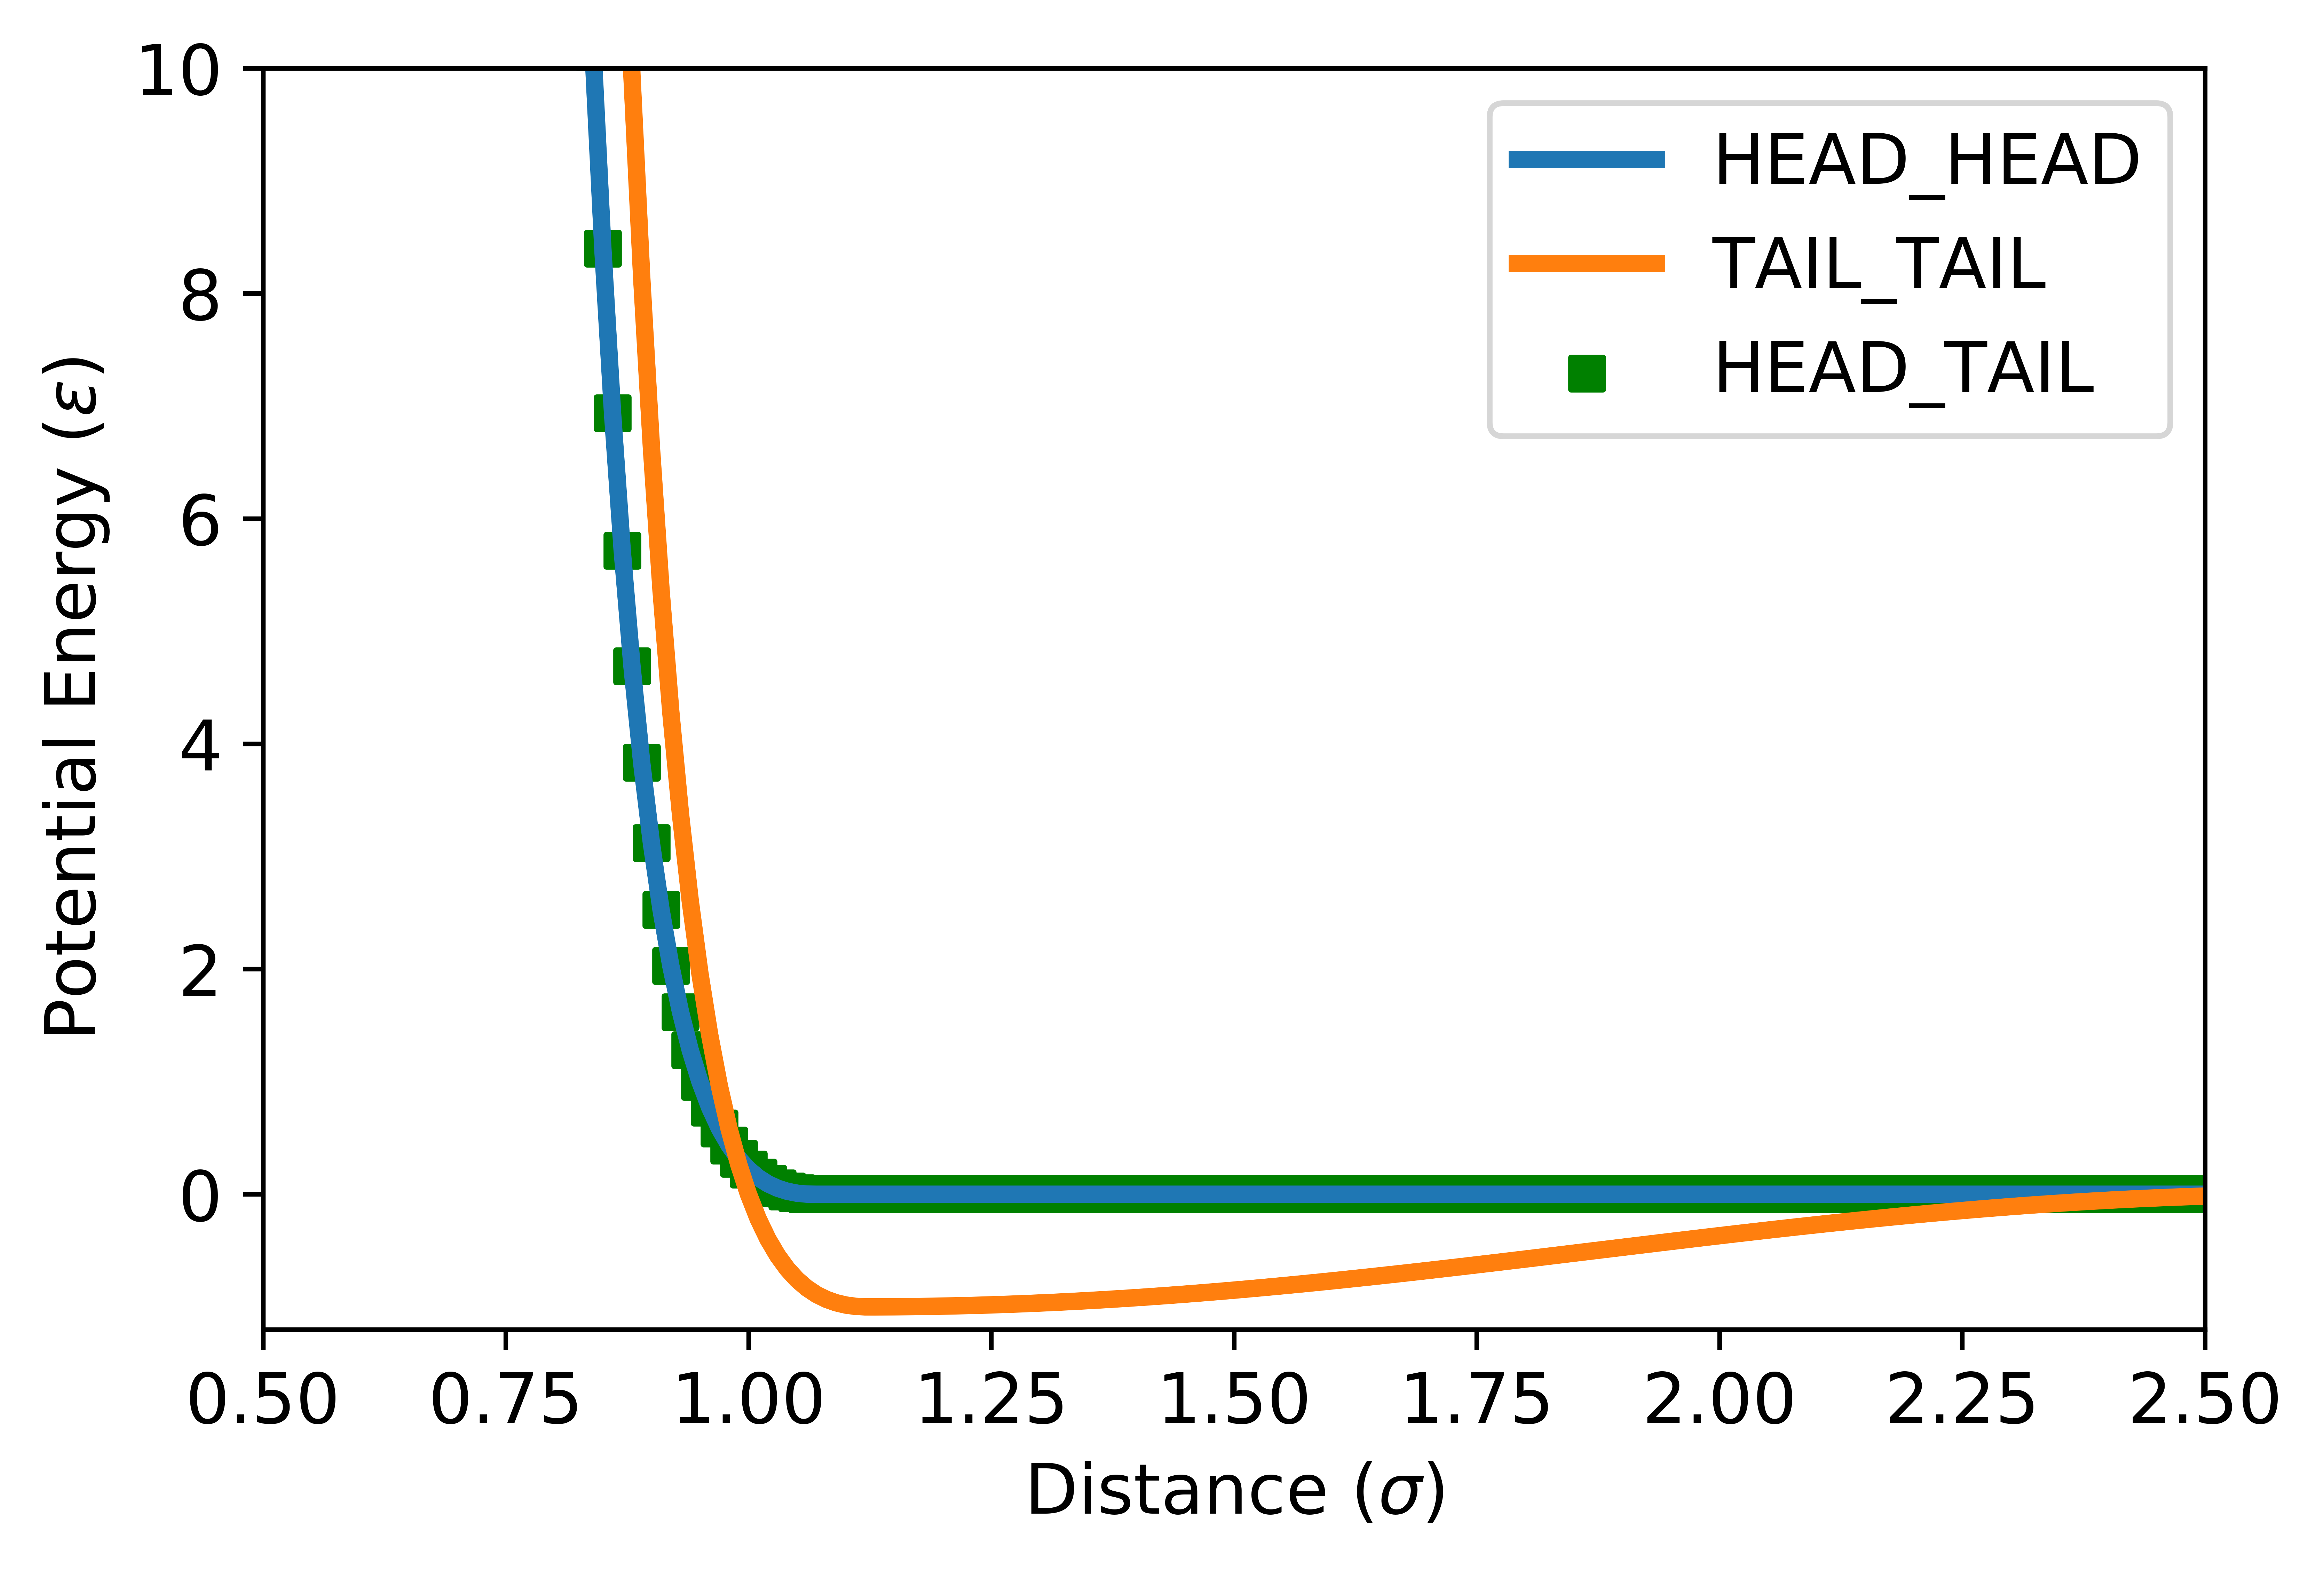

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import tab_pot
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
# Function to parse interaction data from the file
def parse_interaction_data_revised(lines, interaction_type):
    interaction_data = {}
    capturing = False
    for line in lines:
        if line.strip() == interaction_type:
            capturing = True
            interaction_data[interaction_type] = {'distance': [], 'energy': []}
            continue
        if capturing:
            if line.strip().startswith('N') or line.strip() == '':
                continue  # Skip lines with N and R values or empty lines
            elif not line.strip()[0].isdigit():
                break  # Stop capturing if we reach a non-data line
            else:
                parts = line.split()
                if len(parts) >= 3:  # Ensure we have at least 3 parts (index, distance, energy)
                    interaction_data[interaction_type]['distance'].append(float(parts[1]))
                    interaction_data[interaction_type]['energy'].append(float(parts[2]))
    return interaction_data
interaction_types = ['HEAD_HEAD', 'TAIL_TAIL','HEAD_TAIL']
data_file_path = 'standard_interactions.dat'

# Read and display the first few lines of the file to understand its structure
with open(data_file_path, 'r') as file:
    lines = file.readlines()
# Parsing the data again with the revised function
parsed_data_revised = {}
for interaction in interaction_types:
    parsed_data_revised.update(parse_interaction_data_revised(lines, interaction))

# Plotting again
plt.figure(dpi=1200)
symbol = ['o','v','s']
count = 0
for interaction, data in parsed_data_revised.items():
    if count !=2 :
        plt.plot(data['distance'], data['energy'], label=interaction, linewidth = 3)
    else:
        plt.scatter(data['distance'], data['energy'], label=interaction, s = 30,marker=symbol[count],color='g')
    count +=1

plt.xlabel('Distance ($\sigma$)')
plt.ylabel('Potential Energy ($\epsilon$)')
plt.legend()
plt.grid(False)
plt.ylim(-1.2, 10)  # Setting the y-axis limit from -10 to 1
plt.xlim(0.5,2.5)
plt.show()

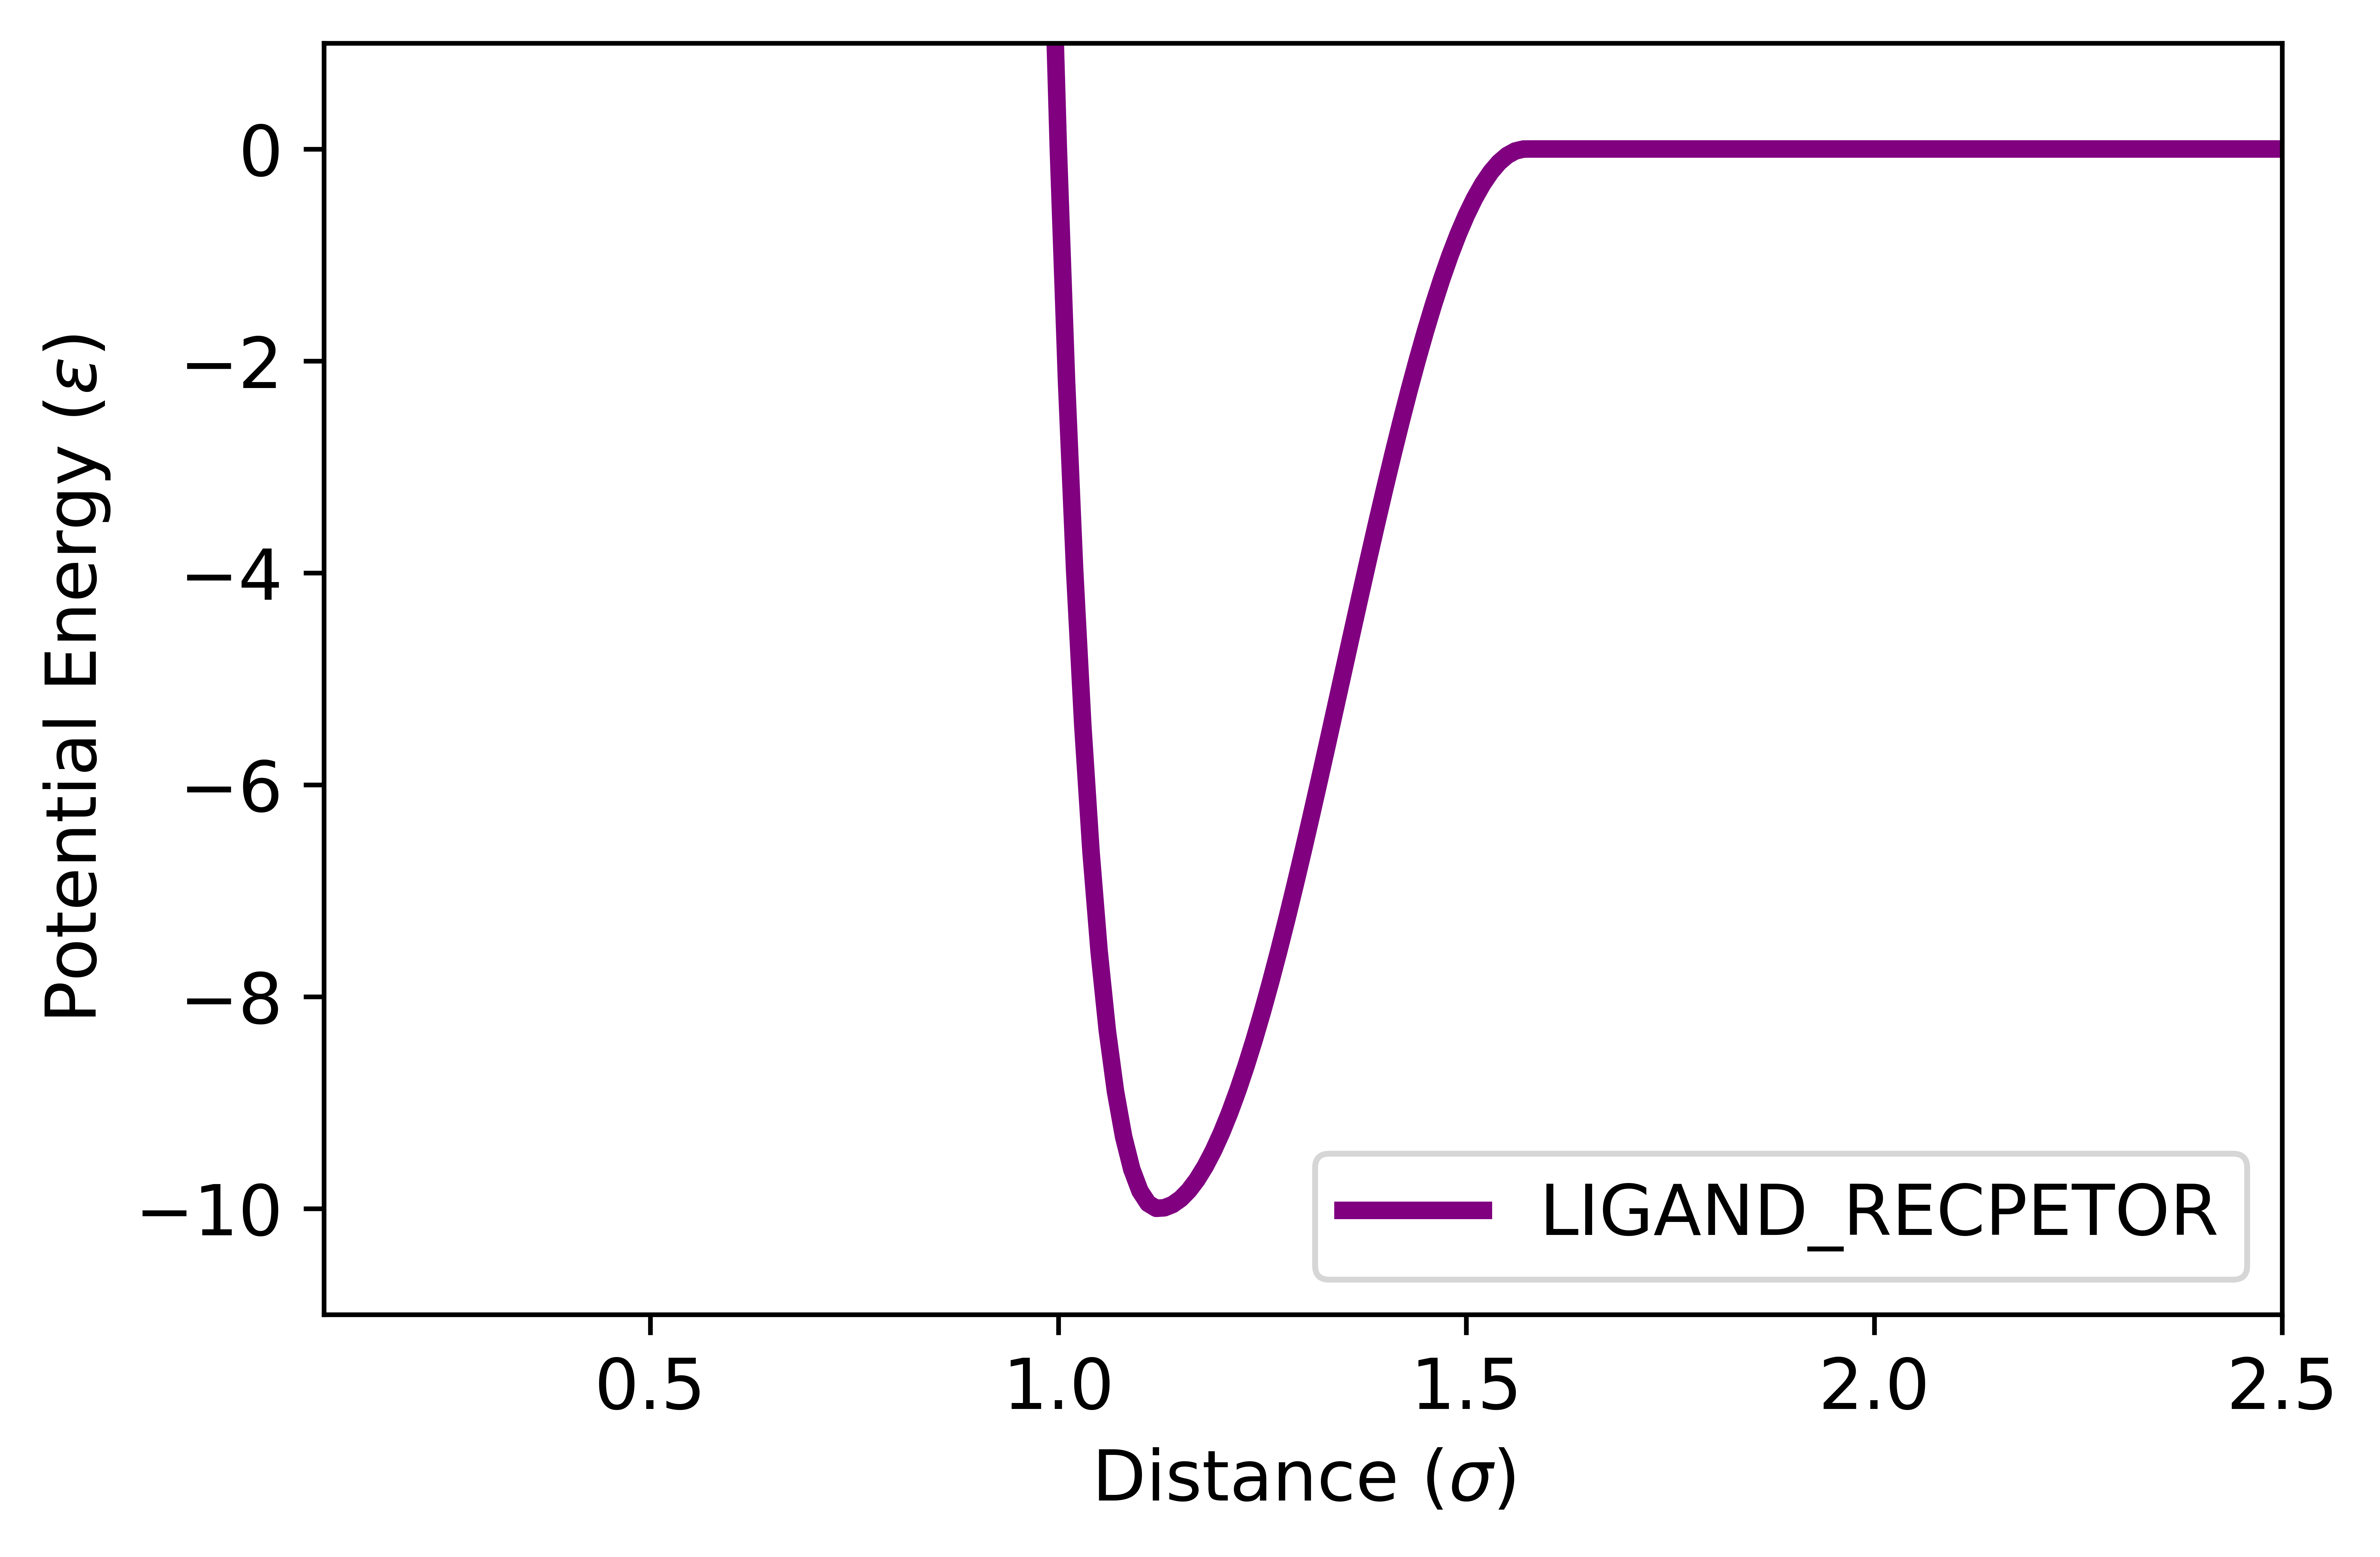

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import tab_pot

# Function to parse interaction data from the file
def parse_interaction_data_revised(lines, interaction_type):
    interaction_data = {}
    capturing = False
    for line in lines:
        if line.strip() == interaction_type:
            capturing = True
            interaction_data[interaction_type] = {'distance': [], 'energy': [], 'force': []}
            continue
        if capturing:
            if line.strip().startswith('N') or line.strip() == '':
                continue  # Skip lines with N and R values or empty lines
            elif not line.strip()[0].isdigit():
                break  # Stop capturing if we reach a non-data line
            else:
                parts = line.split()
                if len(parts) >= 3:  # Ensure we have at least 3 parts (index, distance, energy)
                    interaction_data[interaction_type]['distance'].append(float(parts[1]))
                    interaction_data[interaction_type]['energy'].append(float(parts[2]))
                    interaction_data[interaction_type]['force'].append(float(parts[3]))
    return interaction_data
interaction_types = ['PART_HEAD']
data_file_path = 'standard_interactions.dat'

# Read and display the first few lines of the file to understand its structure
with open(data_file_path, 'r') as file:
    lines = file.readlines()
# Parsing the data again with the revised function
parsed_data_revised = {}
for interaction in interaction_types:
    parsed_data_revised.update(parse_interaction_data_revised(lines, interaction))

# Plotting again
plt.figure(dpi=1200)
symbol = ['o','v','s']
count = 0
for interaction, data in parsed_data_revised.items():
    plt.plot(data['distance'], data['energy'], label='LIGAND_RECPETOR', linewidth = 3,color='purple')

plt.xlabel('Distance ($\sigma$)')
plt.ylabel('Potential Energy ($\epsilon$)')
plt.legend()
plt.grid(False)
plt.ylim(-11,1)  # Setting the y-axis limit from -10 to 1
plt.xlim(0.1,2.5)
plt.show()